Pzygotowanie danych:

In [669]:
from sklearn import datasets
bc_data, bc_target = datasets.load_breast_cancer(return_X_y=True, as_frame=True)
# print(bc_data)

Drzewo decyzyjne dla mean texture, mean symmetry

In [670]:
import pandas as pd

bc_tex_sym_x = pd.DataFrame({"mean texture" : bc_data["mean texture"], "mean symmetry" : bc_data["mean symmetry"]})

from sklearn.model_selection import train_test_split

bc_tex_sym_train_x, bc_tex_sym_test_x, bc_train_y, bc_test_y = train_test_split(bc_tex_sym_x, bc_target, test_size=0.2, random_state=35)

In [671]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

bc_tree = Pipeline([
    ("tree", DecisionTreeClassifier())
])

param_grid = {
    "tree__max_depth" : [2]
}

search_bc_tree = RandomizedSearchCV(
    bc_tree,
    param_distributions=param_grid,
    n_iter = 1,
    cv = 5,
    scoring = "f1"
)

search_bc_tree.fit(bc_tex_sym_train_x, bc_train_y)
print(search_bc_tree.best_params_, search_bc_tree.best_score_)

search_bc_tree.fit(bc_tex_sym_test_x, bc_test_y)
print(search_bc_tree.best_params_, search_bc_tree.best_score_)

{'tree__max_depth': 2} 0.8199420495514034
{'tree__max_depth': 2} 0.8222873422873423


In [672]:
from sklearn.tree import export_graphviz

bc_tree_fin = DecisionTreeClassifier(max_depth=search_bc_tree.best_params_['tree__max_depth'])
bc_tree_fin.fit(bc_tex_sym_train_x, bc_train_y)

print(bc_tree_fin.score(bc_tex_sym_train_x, bc_train_y))

export_graphviz(bc_tree_fin, "bc.png")

0.7824175824175824


In [673]:
for i in range(1, 11):
    from sklearn.tree import export_graphviz

    bc_tree_fin = DecisionTreeClassifier(max_depth=i, random_state=1)
    bc_tree_fin.fit(bc_tex_sym_train_x, bc_train_y)

    file_1 = "f1acc_tree.pkl"

    list_1 = []
    list_1.append(i)

    from sklearn.metrics import f1_score

    list_1.append(f1_score(bc_train_y, bc_tree_fin.predict(bc_tex_sym_train_x)))
    list_1.append(f1_score(bc_test_y, bc_tree_fin.predict(bc_tex_sym_test_x)))

    list_1.append(bc_tree_fin.score(bc_tex_sym_train_x, bc_train_y))
    list_1.append(bc_tree_fin.score(bc_tex_sym_test_x, bc_test_y))

    print(list_1)

    import pickle

    with open(file_1, "wb") as file:
        pickle.dump(list_1, file)

[1, 0.7408906882591093, 0.6935483870967742, 0.7186813186813187, 0.6666666666666666]
[2, 0.8290155440414507, 0.723404255319149, 0.7824175824175824, 0.6578947368421053]
[3, 0.8290155440414507, 0.723404255319149, 0.7824175824175824, 0.6578947368421053]
[4, 0.8421052631578947, 0.7050359712230215, 0.8021978021978022, 0.6403508771929824]
[5, 0.8689883913764511, 0.7172413793103448, 0.8263736263736263, 0.6403508771929824]
[6, 0.8838821490467937, 0.7132867132867133, 0.8527472527472527, 0.6403508771929824]
[7, 0.8971631205673759, 0.7183098591549296, 0.8725274725274725, 0.6491228070175439]
[8, 0.9128014842300557, 0.6616541353383458, 0.8967032967032967, 0.6052631578947368]
[9, 0.9415929203539823, 0.6811594202898551, 0.9274725274725275, 0.6140350877192983]
[10, 0.9579524680073126, 0.6811594202898551, 0.9494505494505494, 0.6140350877192983]


In [674]:
file_1 = "f1acc_tree.pkl"

list_1 = []
list_1.append(search_bc_tree.best_params_['tree__max_depth'])

from sklearn.metrics import f1_score

list_1.append(f1_score(bc_train_y, bc_tree_fin.predict(bc_tex_sym_train_x)))
list_1.append(f1_score(bc_test_y, bc_tree_fin.predict(bc_tex_sym_test_x)))

list_1.append(bc_tree_fin.score(bc_tex_sym_train_x, bc_train_y))
list_1.append(bc_tree_fin.score(bc_tex_sym_test_x, bc_test_y))

print(list_1)

import pickle

with open(file_1, "wb") as file:
    pickle.dump(list_1, file)

[2, 0.9579524680073126, 0.6811594202898551, 0.9494505494505494, 0.6140350877192983]


Regresja:

In [675]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
# df.plot.scatter(x='x',y='y')

In [676]:
from sklearn.tree import DecisionTreeRegressor

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df["x"], df["y"], test_size=0.2, random_state=42)

In [677]:
regression_tree = Pipeline([
    ("tree", DecisionTreeRegressor())
])

param_grid = {
    "tree__max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

search_regression_tree = RandomizedSearchCV(
    regression_tree,
    param_distributions=param_grid,
    n_iter = 10,
    cv = 5,
    scoring = "neg_mean_squared_error"
)

df_train_x = df_train_x.values.reshape(-1,1)
df_test_x = df_test_x.values.reshape(-1,1)

search_regression_tree.fit(df_train_x, df_train_y)
print(search_regression_tree.best_params_, search_regression_tree.best_score_)

search_regression_tree.fit(df_test_x, df_test_y)
print(search_regression_tree.best_params_, search_regression_tree.best_score_)

{'tree__max_depth': 4} -81.06854118452895
{'tree__max_depth': 2} -80.92481608442519


In [678]:
for i in range(1, 11):
    from sklearn.metrics import mean_squared_error

    regression_tree_fin = DecisionTreeRegressor(max_depth=i, random_state=42)
    regression_tree_fin.fit(df_train_x, df_train_y)

    file_2 = "mse_tree.pkl"

    export_graphviz(regression_tree_fin, "reg.png")

    list_2 = []
    list_2.append(i)

    list_2.append(mean_squared_error(df_train_y, regression_tree_fin.predict(df_train_x)))
    list_2.append(mean_squared_error(df_test_y, regression_tree_fin.predict(df_test_x)))

    print(list_2, list_2[1]+list_2[2])

    import pickle

    with open(file_2, "wb") as file:
        pickle.dump(list_2, file)

[1, 123.51026527814338, 136.96281923489505] 260.47308451303843
[2, 81.24951036750478, 81.03224269927217] 162.28175306677696
[3, 67.82429404139877, 68.4202576941818] 136.24455173558056
[4, 60.04522824989591, 59.20427134340888] 119.24949959330479
[5, 53.060910983567815, 72.15471360135192] 125.21562458491974
[6, 47.481753003054976, 81.59782870652394] 129.07958170957892
[7, 41.29670957616478, 86.04528225769128] 127.34199183385607
[8, 36.283600332324575, 90.41947768978852] 126.70307802211309
[9, 29.619297553475402, 96.136606374324] 125.75590392779941
[10, 24.93331524090326, 100.58514041333702] 125.51845565424027


In [679]:
from sklearn.metrics import mean_squared_error

regression_tree_fin = DecisionTreeRegressor(max_depth=search_regression_tree.best_params_['tree__max_depth'], random_state=1)
regression_tree_fin.fit(df_train_x, df_train_y)

file_2 = "mse_tree.pkl"

export_graphviz(regression_tree_fin, "reg.png")

list_2 = []
list_2.append(search_regression_tree.best_params_['tree__max_depth'])

list_2.append(mean_squared_error(df_train_y, regression_tree_fin.predict(df_train_x)))
list_2.append(mean_squared_error(df_test_y, regression_tree_fin.predict(df_test_x)))

print(list_2, list_2[1]+list_2[2])

import pickle

with open(file_2, "wb") as file:
    pickle.dump(list_2, file)

[2, 81.24951036750478, 81.03224269927217] 162.28175306677696


Sporządź wykres wszystkich danych z df oraz predykcji regresora, porównaj wyniki z tymi
osiągniętymi dla regresji wielomianowej i KNN z poprzednich ćwiczeń.

In [680]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

regression_poly = Pipeline([
    ("poly", PolynomialFeatures(degree=4, include_bias=True)),
    ("regressor", LinearRegression())
])

regression_poly.fit(df['x'].values.reshape(-1,1), df['y'])

line = np.linspace(-2.5, 2.5, 10000)

regression_knn = KNeighborsRegressor(n_neighbors=5)
regression_knn.fit(df['x'].values.reshape(-1,1), df['y'])

KNeighborsRegressor()

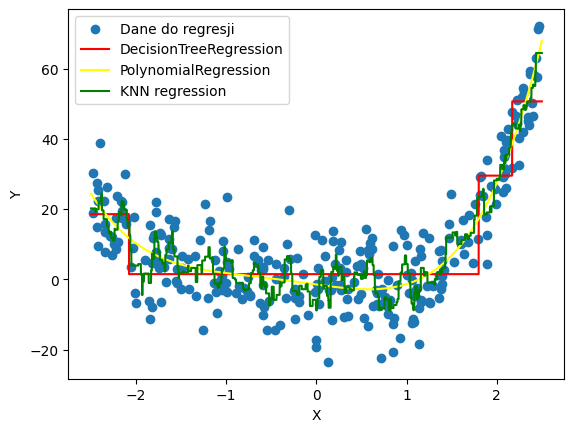

In [681]:
plt.scatter(df['x'], df['y'], label="Dane do regresji")
plt.plot(line, regression_tree_fin.predict(line.reshape(-1, 1)), color='red', label="DecisionTreeRegression")
plt.plot(line, regression_poly.predict(line.reshape(-1,1)), color='yellow', label="PolynomialRegression")
plt.plot(line, regression_knn.predict(line.reshape(-1, 1)), color='green', label="KNN regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()